In [49]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.lines import Line2D

current_directory = os.getcwd()
time = 5000
mtd_type = 'shuffle_diversity'
attack_operation_record = pd.read_csv(current_directory+ '\\data_analysis\\attack_operation_record_'+str(time)+'_'+mtd_type+'.csv')
mtd_operation_record = pd.read_csv(current_directory+'\\data_analysis\\mtd_operation_record_'+str(time)+'_'+mtd_type+'.csv')

In [50]:
mtd_operation_record.head()

,name,start_time,finish_time,duration,executed_at
0,HostTopologyShuffle,0.000000,60.553918,60.553918,network
1,osdiversity,31.553768,61.633155,30.079387,application
2,osdiversity,62.461963,92.621012,30.159049,application
3,PortShuffle,93.064513,128.555236,35.490723,application
4,HostTopologyShuffle,123.097565,183.352396,60.254831,network


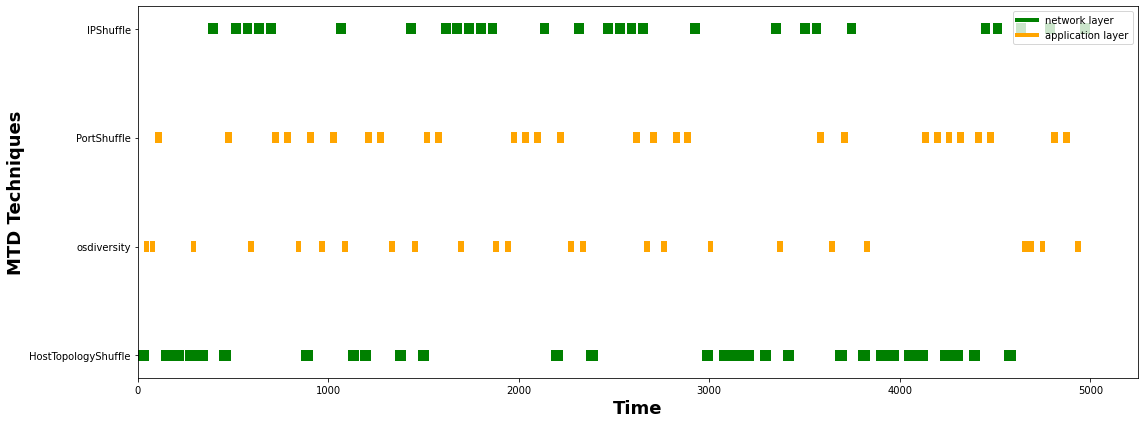

In [51]:
mtd_operation_record['color'] = np.where(mtd_operation_record['executed_at']=='network', 'green', 'orange')
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.barh(mtd_operation_record['name'], mtd_operation_record['duration'], left=mtd_operation_record['start_time'], height=0.1, color=mtd_operation_record['color'])


custom_lines_mtd = [Line2D([0], [0], color='green', lw=4),
                    Line2D([0], [0], color='orange', lw=4)]
ax.legend(custom_lines_mtd, ['network layer', 'application layer'], loc='upper right')
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('MTD Techniques', weight='bold', fontsize=18)
fig.tight_layout()
plt.savefig('data_analysis/mtd_record.png')
plt.show()

In [52]:
attack_operation_record.head()

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
0,SCAN_HOST,0.000000,10.000000,10.000000,-1,0,0,0,None,[],None,None
1,ENUM_HOST,10.000000,25.000000,15.000000,-1,0,0,0,None,[],None,None
2,SCAN_PORT,25.000000,45.000000,20.000000,0,1,0,0,None,[],None,None
3,EXPLOIT_VULN,45.000000,60.553918,15.553918,0,1,0,0,None,[],network,HostTopologyShuffle
4,SCAN_HOST,62.553918,72.553918,10.000000,-1,0,0,0,None,[],None,None


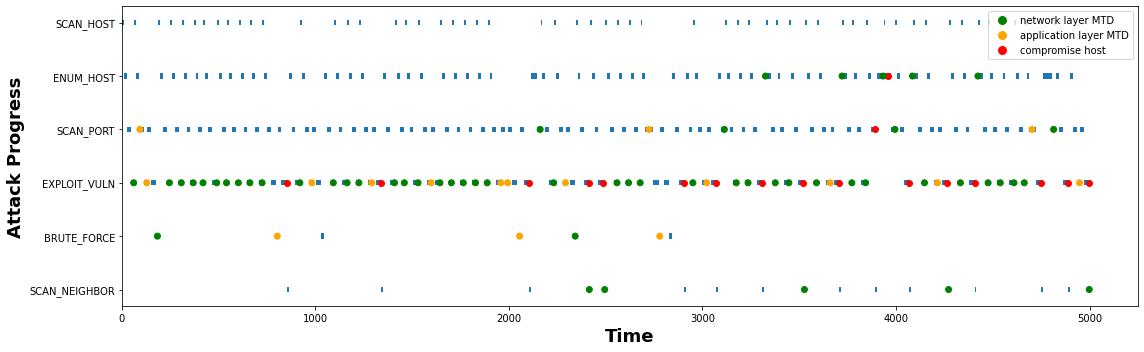

In [53]:
fig2, ax2 = plt.subplots(1, figsize=(16, 5))
ax2.barh(attack_operation_record['name'], attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.1, zorder=1)


interrupted_record = attack_operation_record[attack_operation_record['interrupted_in']!='None']
interrupted_record['color'] = np.where(interrupted_record['interrupted_in']=='network', 'green', 'orange')
ax2.scatter(interrupted_record['finish_time'], interrupted_record['name'], color=interrupted_record['color'], zorder=3)


compromise_record = attack_operation_record[attack_operation_record['compromise_host'] != 'None']
ax2.scatter(compromise_record['finish_time'], compromise_record['name'], color='red', zorder=2)


custom_lines_attack = [Line2D([0], [0], marker='o',color='w', markerfacecolor='green', markersize=10),
                       Line2D([0], [0], marker='o',color='w', markerfacecolor='orange', markersize=10),
                       Line2D([0], [0], marker='o',color='w', markerfacecolor='red', markersize=10),]

ax2.legend(custom_lines_attack, ['network layer MTD', 'application layer MTD', 'compromise host'], loc='upper right')

plt.gca().invert_yaxis()
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Attack Progress', weight='bold', fontsize=18)
fig2.tight_layout()
plt.savefig('data_analysis/attack_record.png')
plt.show()

In [54]:
attack_operation_record[(attack_operation_record['name'] == 'SCAN_PORT') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
239,SCAN_PORT,3869.970528,3889.970528,20.0,44,3,257,10,44,"['Carissa', 'Yolanda', 'Faunie']",None,None


In [55]:
attack_operation_record[(attack_operation_record['name'] == 'EXPLOIT_VULN') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
54,EXPLOIT_VULN,824.432856,851.285286,26.852430,1,2,42,0,1,"['Molli', 'Phyllis', 'Lulu', 'Nadine', 'Antoin...",None,None
82,EXPLOIT_VULN,1313.279261,1339.160966,25.881705,32,5,86,1,32,"['Chandra', 'Fredra', 'Celestina', 'Darcie', '...",None,None
127,EXPLOIT_VULN,2077.390065,2103.314215,25.924150,32,8,104,2,32,"['Bettine', 'Caritta', 'Shellie', 'Agnes', 'Au...",None,None
146,EXPLOIT_VULN,2389.213098,2414.622257,25.409158,44,1,114,3,44,"['Sukey', 'Biddy', 'Ondrea', 'Cherilynn']",None,None
151,EXPLOIT_VULN,2462.078804,2487.873467,25.794662,44,2,121,4,44,"['Isadora', 'Cordi', 'Jeannine', 'Fayre']",None,None
176,EXPLOIT_VULN,2877.853069,2903.063167,25.210097,46,2,134,5,46,"['Sophey', 'Haleigh', 'Harlie', 'Jania', 'Cole...",None,None
186,EXPLOIT_VULN,3043.674490,3068.872120,25.197630,43,2,181,6,43,"['Zenia', 'Tonie', 'Codie', 'Liane', 'Kylila']",None,None
201,EXPLOIT_VULN,3282.324122,3308.533937,26.209816,42,2,195,7,42,"['Petra', 'Marjy', 'Mae', 'Odelia', 'Trixi']",None,None
215,EXPLOIT_VULN,3493.290104,3518.397868,25.107764,31,6,197,8,31,"['Viola', 'Linell', 'Karlie', 'Engracia']",None,None
226,EXPLOIT_VULN,3681.642966,3707.059377,25.416410,30,6,223,9,30,"['Carlin', 'Kacie', 'Emmie', 'Rora']",None,None


In [56]:
attack_operation_record[(attack_operation_record['name'] == 'BRUTE_FORCE') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
